In [1]:
import os
cwd = os.getcwd()
import seaborn as sns
import pandas as pd
import numpy as np
from opensim_utils_g import readMotionFile
import matplotlib.pyplot as plt
import perform_opensim_analyses_ACL
import AssignPropertiesCustomLigament
import scipy as sp
import scipy.interpolate
%matplotlib inline

D:\LocalDisk\Programs\WinPython-64bit-2.7.10.3\python-2.7.10.amd64\lib\site-packages\matplotlib\__init__.py:1354: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
subjects = pd.DataFrame(['Ahelaos','Amanda','Celine','CharlotteH','CharlotteV','Esther','Filip',\
           'Franceska','Guido','Jeroen'])
age = pd.DataFrame([22,21,22,21,21,22,22,25,24,22])
BW = pd.DataFrame([74.0061,57.0846,57.7982,59.5311,54.6381,59.633,86.5443,58.2059,64.3221,72.0163])
data = pd.concat((subjects,age,BW),axis=1)
columns=['Names','Age','BodyWeight']
data.columns=columns
length = len(subjects)

In [1116]:
"""First normalize and average between the trials"""
subjects = ['Ahelaos','Amanda','Celine','CharlotteH','CharlotteV','Esther','Filip',\
           'Franceska','Guido','Jeroen']
for i in range(0,length):
    name = subjects[i]
    results_dir = cwd+'/Data/'+name+'/Results'
    subj_dir = os.path.dirname(results_dir)
    """RRA angles, velocities, accelerations"""
    for k in range(1,4):
        """Load angles"""
        header, labels, data = readMotionFile(results_dir+'/HDR_'+str(k)+'_Kinematics_q.sto')
        kinem = pd.DataFrame(data,columns=labels)
        kinem = kinem.drop(columns = 'time')
        # Interpolate the data using a quadratic spline to "new_length" samples
        new_length = 300
        x = np.array(range(0,len(kinem)))
        y = kinem.values
        new_x = np.linspace(0, len(kinem)-1, new_length)
        kinematics_int = pd.DataFrame(sp.interpolate.interp1d(x, y, axis=0, kind='quadratic')(new_x),columns=kinem.columns)
        
        """Load velocities"""
        header, labels, data = readMotionFile(results_dir+'/HDR_'+str(k)+'_Kinematics_u.sto')
        labels = [n+'_v' for n in labels]
        veloc = pd.DataFrame(data,columns=labels)
        veloc = veloc.drop(columns = 'time_v')
        # Interpolate the data using a quadratic spline to "new_length" samples
        new_length = 300
        x = np.array(range(0,len(veloc)))
        y = veloc.values
        new_x = np.linspace(0, len(veloc)-1, new_length)
        velocities_int = pd.DataFrame(sp.interpolate.interp1d(x, y, axis=0, kind='quadratic')(new_x),columns=veloc.columns)
        
        """Load accelerations"""
        header, labels, data = readMotionFile(results_dir+'/HDR_'+str(k)+'_Kinematics_dudt.sto')
        labels = [ni+'_acc' for ni in labels]
        accelerations = pd.DataFrame(data,columns=labels)
        accelerations = accelerations.drop(columns = 'time_acc')
        # Interpolate the data using a quadratic spline to "new_length" samples
        new_length = 300
        x = np.array(range(0,len(accelerations)))
        y = accelerations.values
        new_x = np.linspace(0, len(accelerations)-1, new_length)
        accelerations_int = pd.DataFrame(sp.interpolate.interp1d(x, y, axis=0, kind='quadratic')(new_x),columns=accelerations.columns)
                
        """Concatenate all """
        
        mat_all = pd.concat([kinematics_int,velocities_int,accelerations_int],axis=1)
        mat_ang = kinematics_int
        mat_vel = velocities_int
        mat_acc = accelerations_int
        """Create the complete array for all three trials"""
        if k==1:
            a = mat_ang
            v = mat_vel
            ac = mat_acc
            all_kin = mat_all
        else:
            a = pd.concat([a,mat_ang],axis=1,ignore_index = False)
            v = pd.concat([v,mat_vel],axis=0,ignore_index = True)
            ac = pd.concat([ac,mat_acc],axis=0,ignore_index = True)
            all_kin = pd.concat([all_kin,mat_all],axis=0,ignore_index = True)
    """Create the array for all subjects"""
    if i==0:
        subj_all_angles = a
        subj_all_velocities = v
        subj_all_accelerations = ac
        subj_all = all_kin
    else:
        subj_all_angles = pd.concat([subj_all_angles,a],axis=1,ignore_index = False)
        subj_all_velocities = pd.concat([subj_all_velocities,v],axis=0,ignore_index = True)
        subj_all_accelerations = pd.concat([subj_all_accelerations,ac],axis=0,ignore_index = True)
        subj_all = pd.concat([subj_all,all_kin],axis=0,ignore_index = True)

In [1117]:
subj_all_angles.head()

pelvis_tilt  pelvis_list  pelvis_rotation  pelvis_tx  pelvis_ty  pelvis_tz  \
0    10.293090     8.390564        -0.555727  -0.476396   1.025600   0.207514   
1    10.335591     8.352995        -0.515376  -0.475461   1.024330   0.207518   
2    10.338299     8.350840        -0.512843  -0.475404   1.024252   0.207518   
3    10.364334     8.326343        -0.487888  -0.474820   1.023450   0.207521   
4    10.390854     8.301664        -0.462516  -0.474228   1.022637   0.207525   

   hip_flexion_r  hip_adduction_r  hip_rotation_r  knee_angle_r  ...  \
0      15.518009        -7.174246      -10.242955    -21.222013  ...   
1      15.621838        -7.131802      -10.169716    -21.541212  ...   
2      15.627906        -7.129404      -10.165264    -21.560350  ...   
3      15.694916        -7.101494      -10.119067    -21.763348  ...   
4      15.762548        -7.073412      -10.072256    -21.968750  ...   

   pro_sup_r  wrist_flex_r  wrist_dev_r  arm_flex_l  arm_add_l  arm_rot_l  \
0  63.782328           0.0          0.0  -28.111630 -17.390523  -3.794724   
1  63.783655           0.0          0.0  -28.104255 -17.389265  -3.785965   
2  63.785027           0.0          0.0  -28.096552 -17.388040  -3.777074   
3  63.786443           0.0          0.0  -28.088521 -17.386845  -3.768049   
4  63.787905           0.0          0.0  -28.080156 -17.385679  -3.758889   

   elbow_flex_l  pro_sup_l  wrist_flex_l  wrist_dev_l  
0     65.778606  60.578973           0.0          0.0  
1     65.794900  60.599945           0.0          0.0  
2     65.810918  60.621048           0.0          0.0  
3     65.826662  60.642284           0.0          0.0  
4     65.842125  60.663648           0.0          0.0  

[5 rows x 1410 columns]

In [1118]:
colmn_drop = ['knee_adduction_r','knee_adduction_l','knee_rotation_r','knee_rotation_l','knee_anterior_posterior_r',\
             'knee_anterior_posterior_l','knee_inferior_superior_r','knee_inferior_superior_l',\
             'knee_medial_lateral_r','knee_medial_lateral_l','subtalar_angle_r','subtalar_angle_l',\
             'mtp_angle_r','mtp_angle_l','wrist_flex_r','wrist_flex_l','wrist_dev_r','wrist_dev_l']
#               ,\
#              'pelvis_tx','pelvis_ty','pelvis_tz']

In [1119]:
subj_all_angles_drop = subj_all_angles.drop(columns = colmn_drop)

In [1336]:
list_colums = np.array(subj_all_angles_drop.columns.unique())
list_colums

array(['pelvis_tilt', 'pelvis_list', 'pelvis_rotation', 'pelvis_tx',
       'pelvis_ty', 'pelvis_tz', 'hip_flexion_r', 'hip_adduction_r',
       'hip_rotation_r', 'knee_angle_r', 'ankle_angle_r', 'hip_flexion_l',
       'hip_adduction_l', 'hip_rotation_l', 'knee_angle_l',
       'ankle_angle_l', 'lumbar_extension', 'lumbar_bending',
       'lumbar_rotation', 'arm_flex_r', 'arm_add_r', 'arm_rot_r',
       'elbow_flex_r', 'pro_sup_r', 'arm_flex_l', 'arm_add_l',
       'arm_rot_l', 'elbow_flex_l', 'pro_sup_l'], dtype=object)

# PCA implemented per variable for whole time series

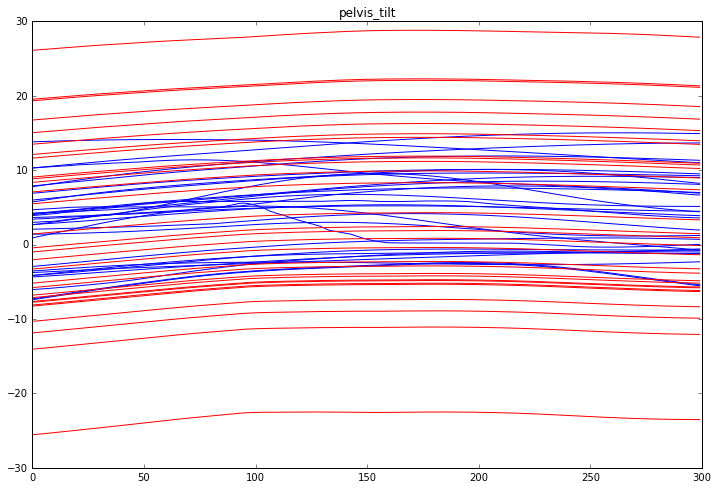

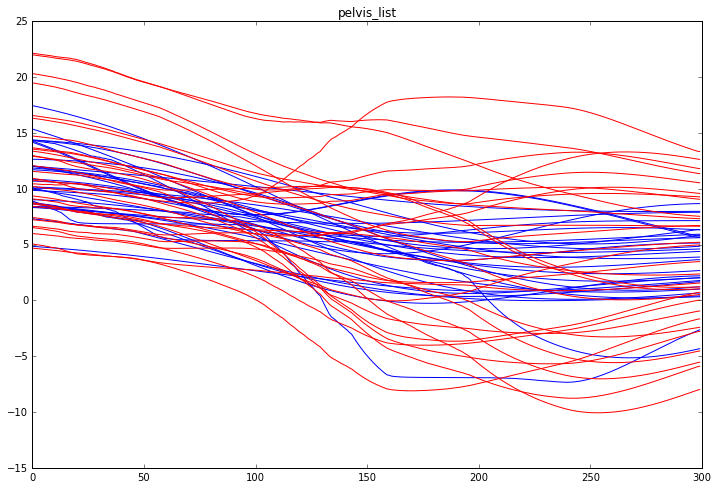

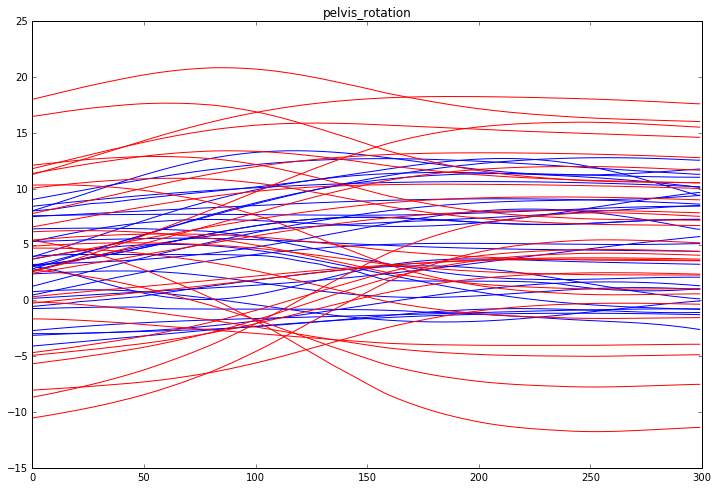

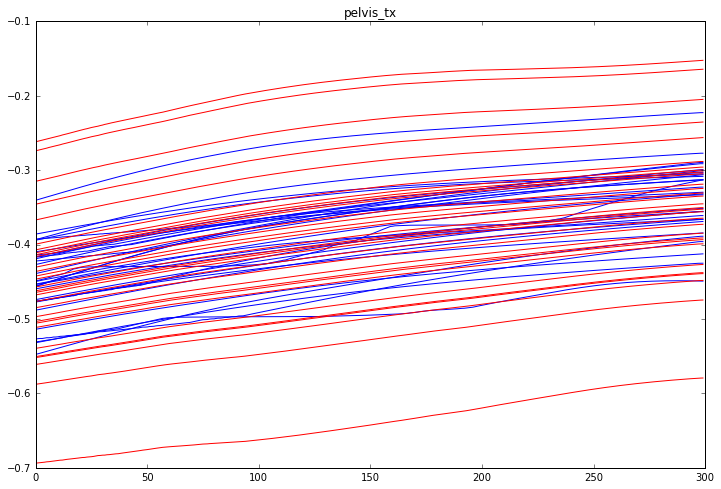

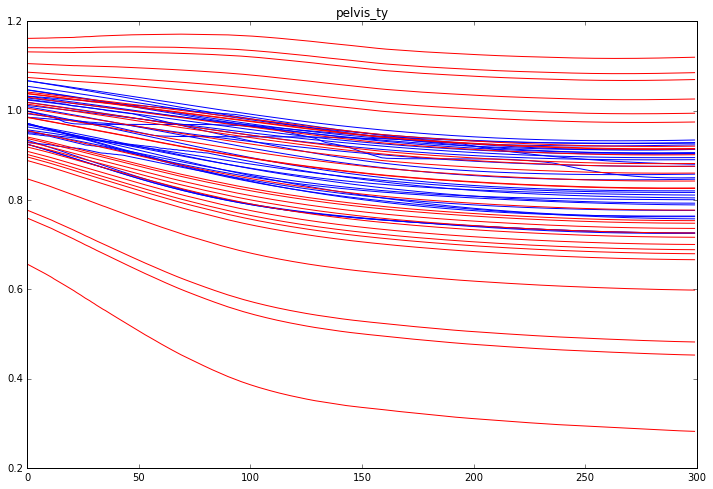

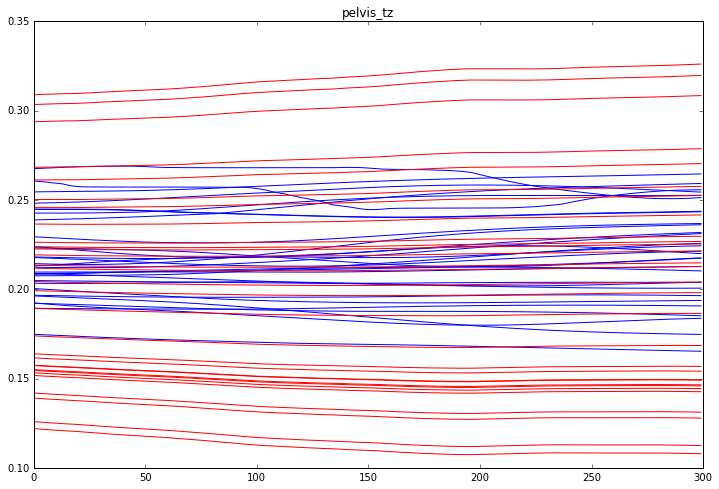

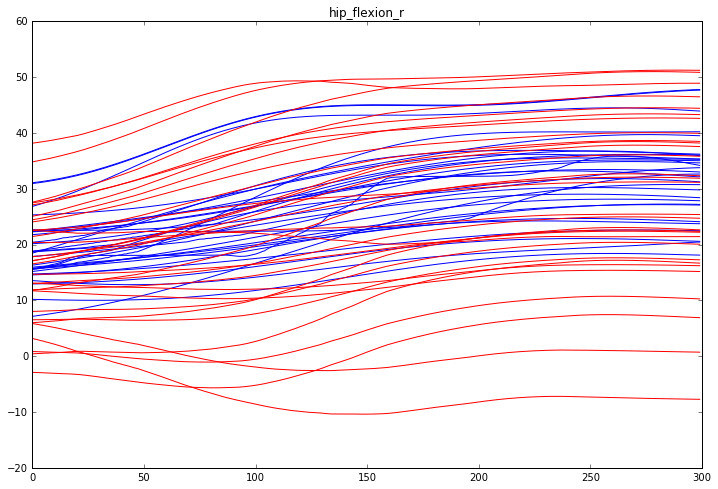

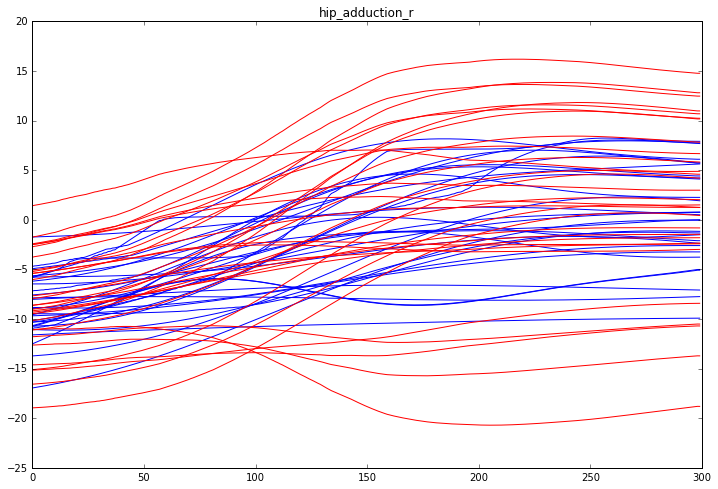

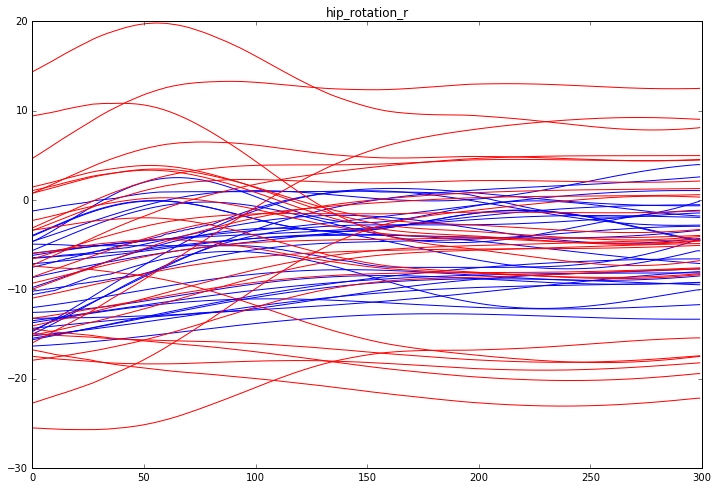

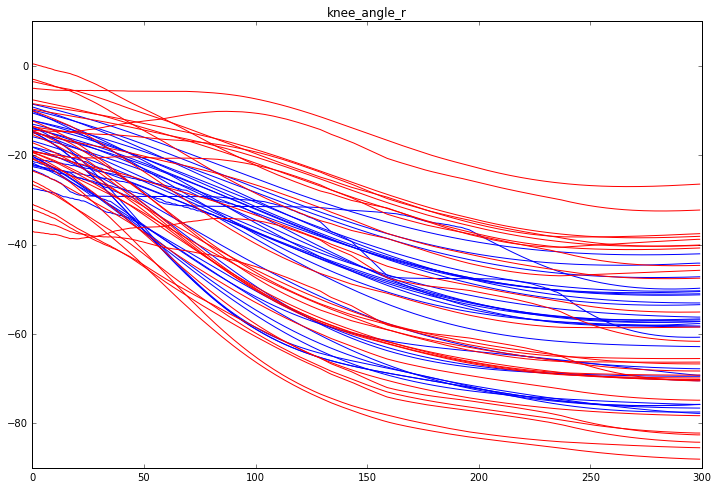

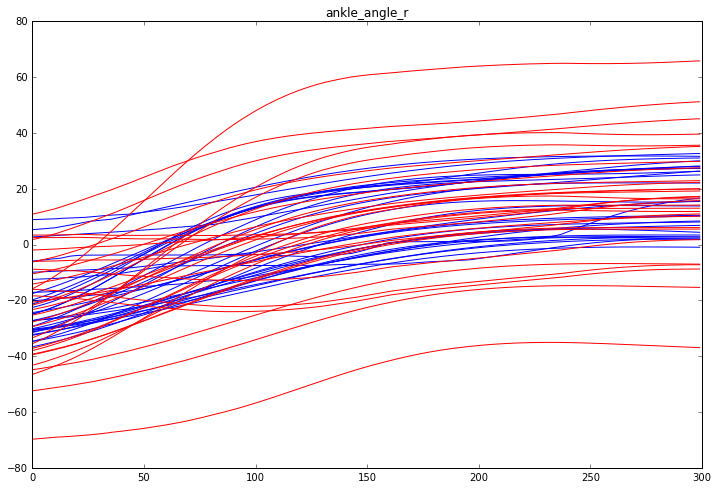

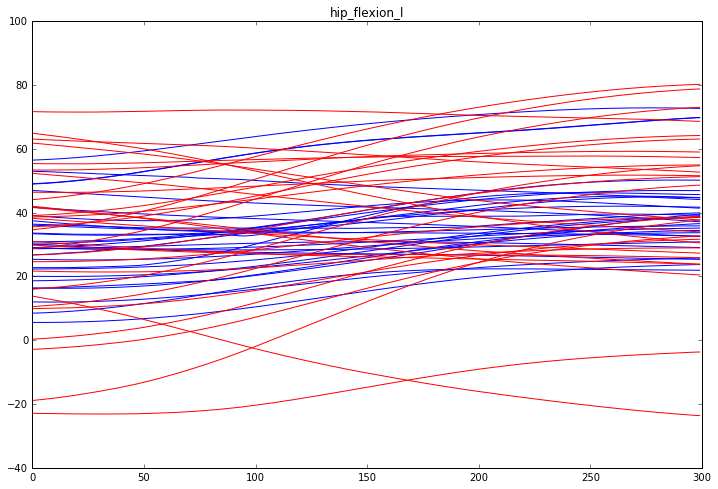

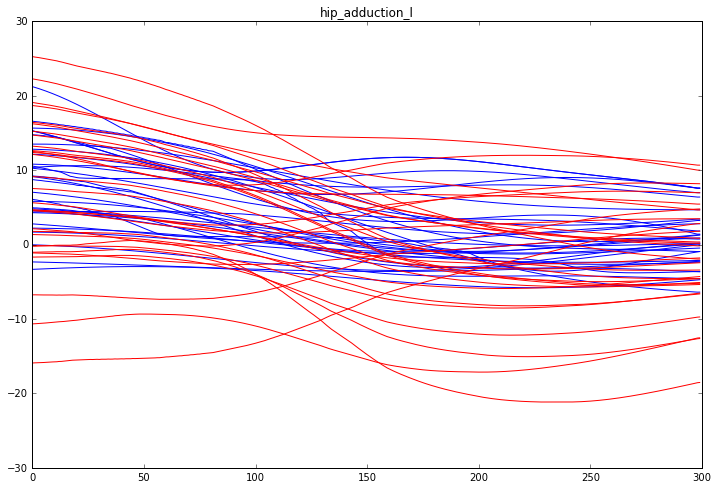

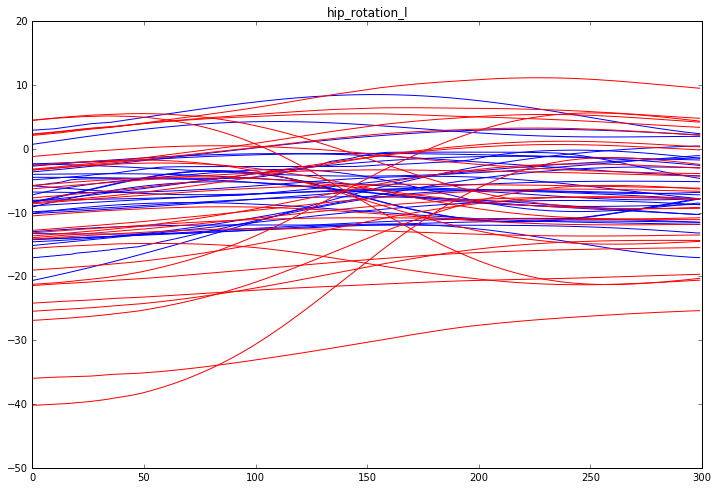

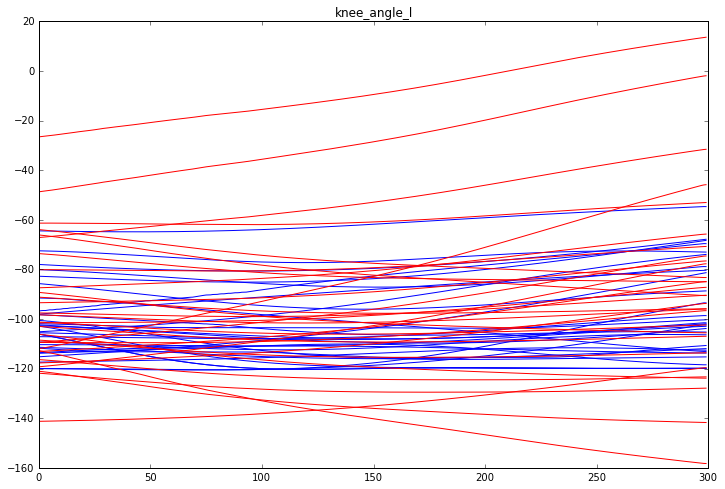

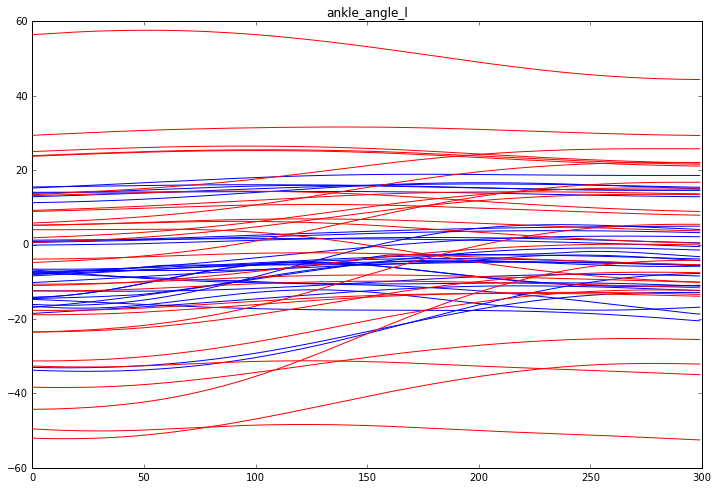

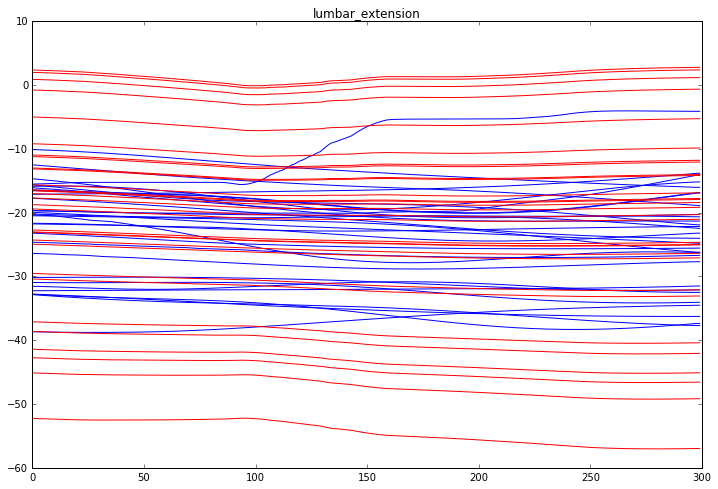

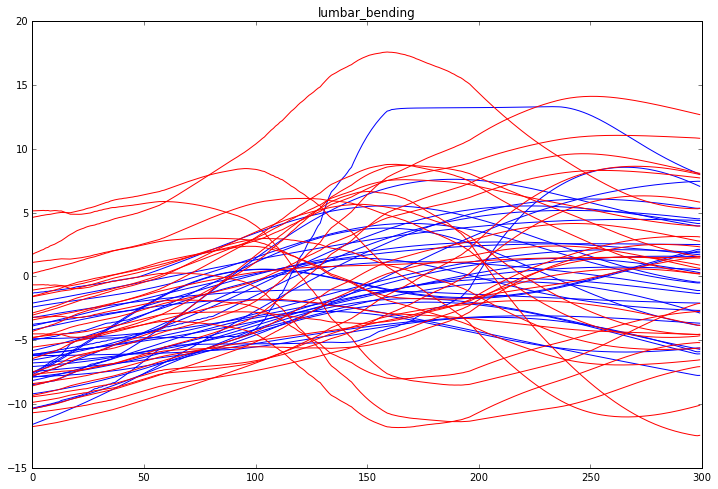

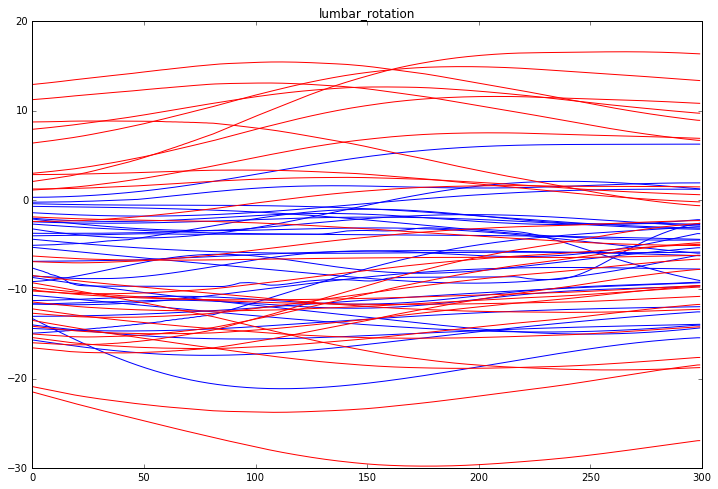

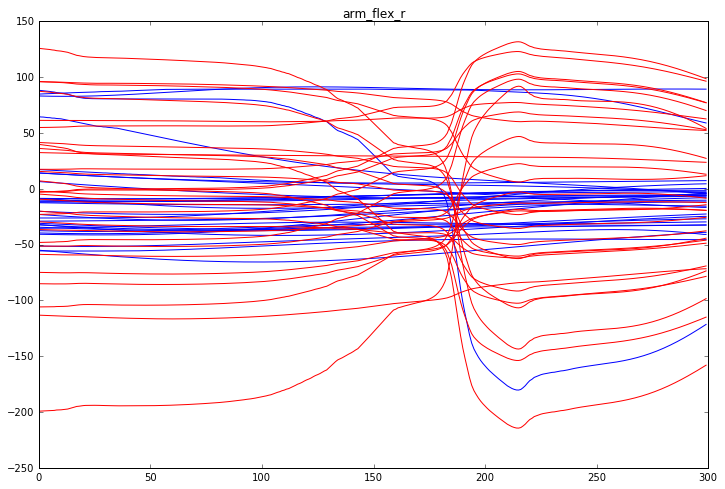

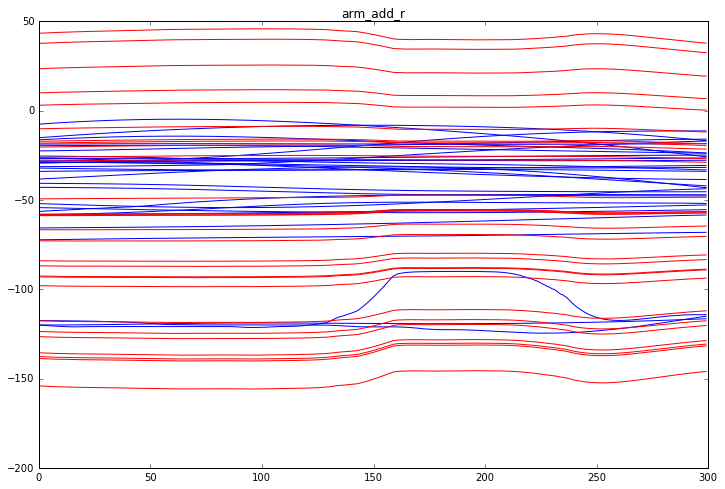

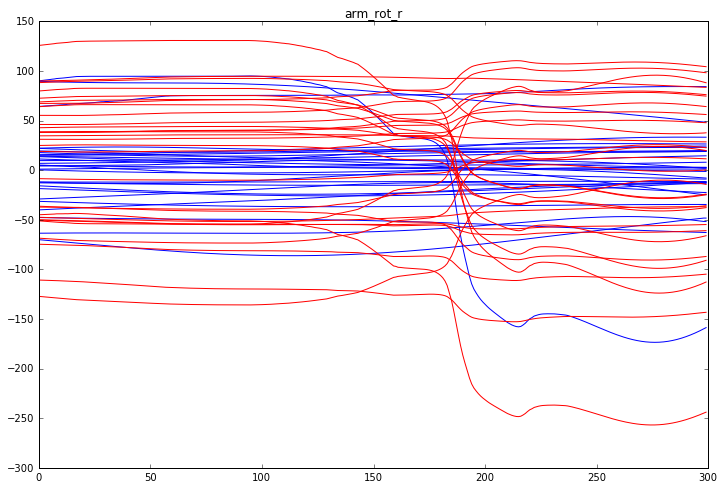

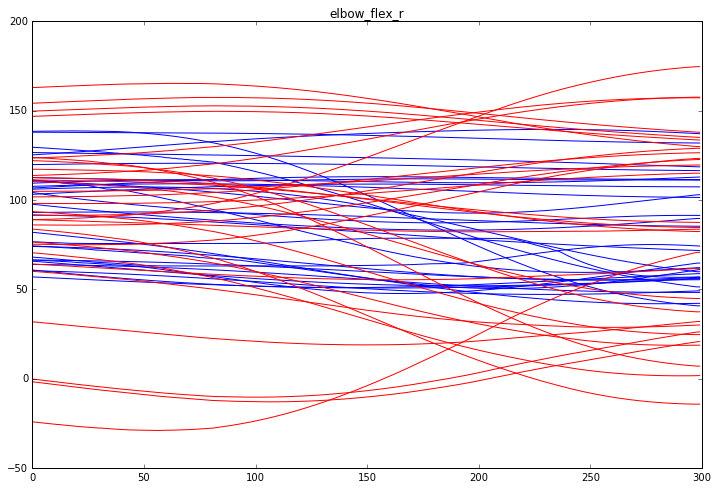

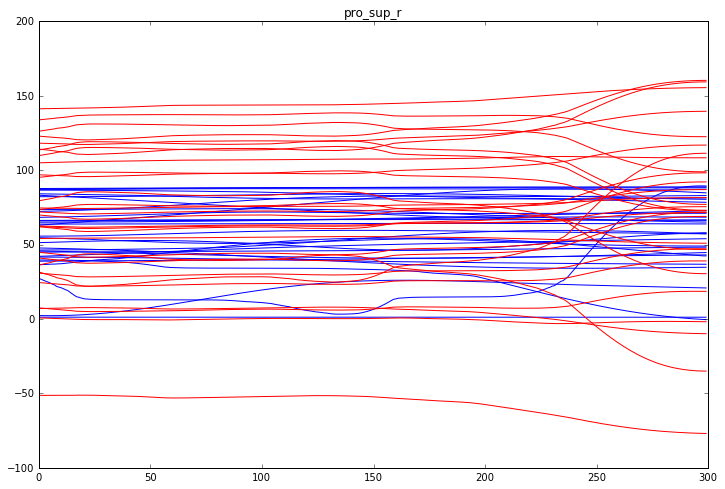

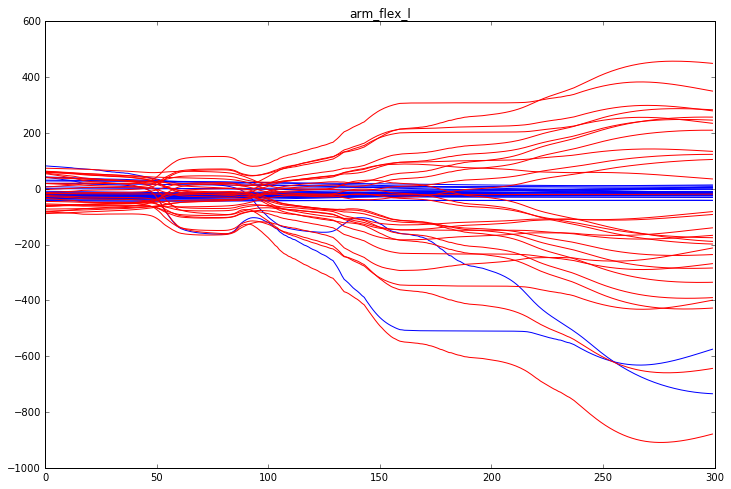

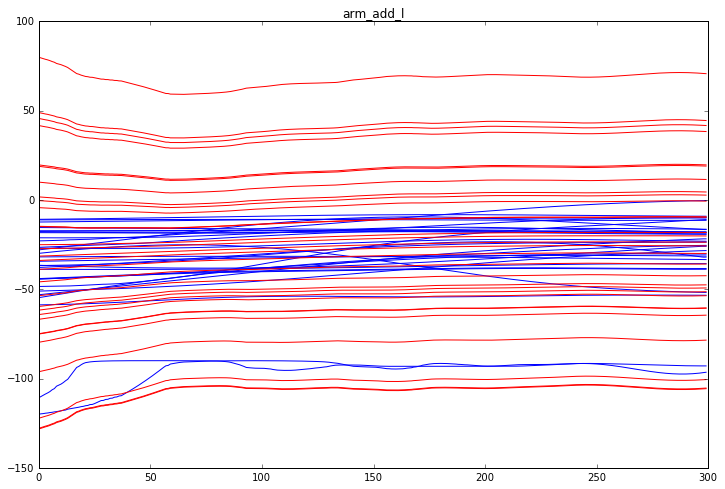

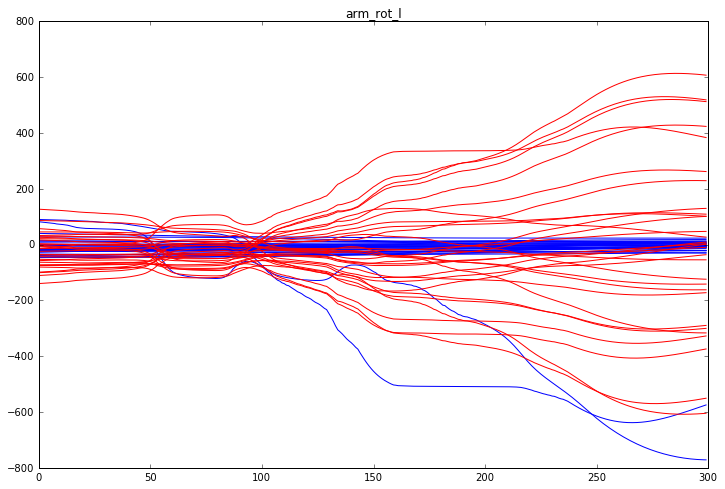

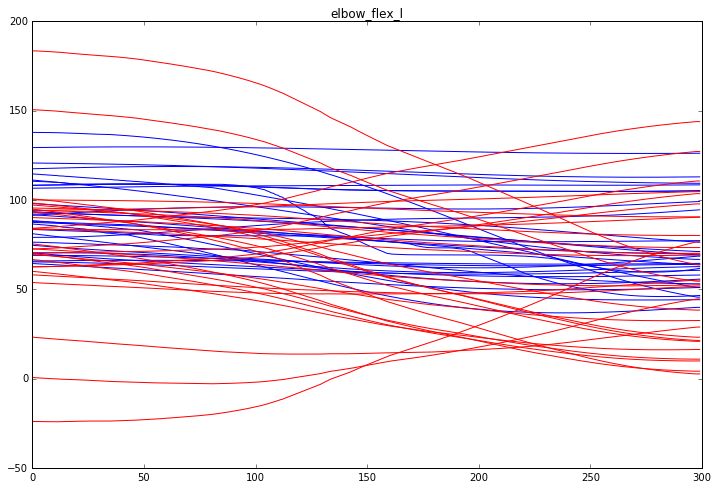

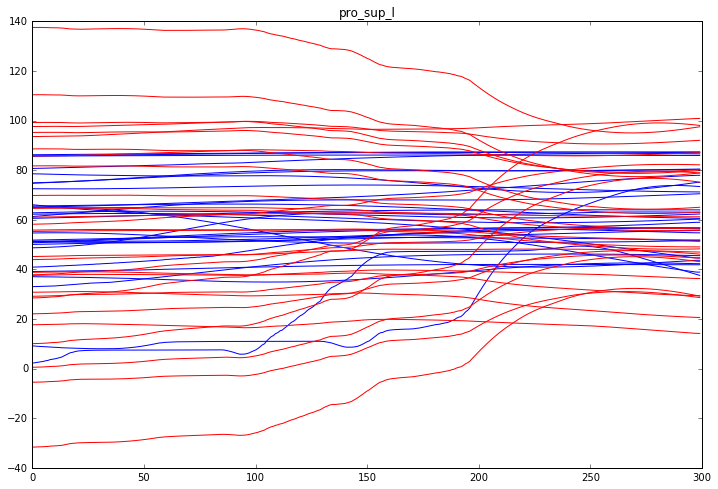

In [1352]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import truncnorm

for k in range(list_colums.size):
    x = subj_all_angles_drop[list_colums[k]].T.values #transpose the matrix so as the columns are the time intervals and rows
    scaler = StandardScaler()
    data_rescaled = scaler.fit_transform(x)
    #Fitting the PCA algorithm with our Data
    pca = PCA().fit(data_rescaled)
    #The cumulative sum of explained variance
    y = np.cumsum(pca.explained_variance_ratio_)
    #which number of components explain above 95% variance
    index = np.where(0.95<y)
    pc_number = index[0][0]+1 #minimum number of necessary components
    #Perform PCA with the designated number of principal components
    pca = PCA(n_components=pc_number)
    principalComponents = pca.fit_transform(data_rescaled)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc{}'.format(i) for i in range(1,principalComponents.shape[1]+1) ])
    """Randomize the principal components"""
    data=np.empty((0,principalDf.shape[1]))
    principalDf_rand = principalDf.copy()
    
    """Randomization of individual principal component - This is an important step!
    Yoy can either select row-wise or column-wise and different settings on the selected normal distribution"""
    for col in range(0,principalDf_rand.shape[1]):
        myclip_a = -principalDf.iloc[:,col].std()*3 # arbitrary multiplication number to generate satisfactory brandwith of data
        myclip_b = principalDf.iloc[:,col].std()*3
        my_mean = principalDf.iloc[:,col].mean()
        my_std = principalDf.iloc[:,col].std()
        a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
        arr = truncnorm.rvs(a, b, loc =my_mean, scale = my_std,size = principalDf_rand.shape[0])
        #Alternative randomization based on simple normal distribution
        arr1 = np.random.normal(principalDf.iloc[:,col].mean(),principalDf.iloc[:,col].std()*2,\
                               size = (principalDf_rand.shape[0],1))

        principalDf_rand.iloc[:,col] = arr1
#     for row in range(0,principalDf_rand.shape[0]):
#         arr1 = np.random.normal(principalDf.iloc[row,:].mean(),principalDf.iloc[row,:].std(),\
#                                size = (1,principalDf_rand.shape[1]))
#         myclip_a = -principalDf.iloc[row,:].std()*2
#         myclip_b = principalDf.iloc[row,:].std()*2
#         my_mean = principalDf.iloc[row,:].mean()
#         my_std = principalDf.iloc[row,:].std()
#         a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
#         arr = truncnorm.rvs(a, b, loc =my_mean, scale = my_std,size = principalDf_rand.shape[1])
#         principalDf_rand.iloc[row,:] = arr   
    principalComponents_new = principalDf_rand.values
    data_rescaled_new = pca.inverse_transform(principalComponents_new)
    data_unscaled_new = scaler.inverse_transform(data_rescaled_new)
    # new_data = pd.DataFrame(data = data_unscaled_new,columns=subj_all_angles_drop.columns)
    new_data = pd.DataFrame(data = data_unscaled_new,index=subj_all_angles_drop[list_colums[k]].T.index)

    new_data = new_data.T

    fig = plt.figure(figsize=(12, 8))
    plt.plot(subj_all_angles_drop[list_colums[k]],'b')
    plt.plot(new_data[list_colums[k]],'r')
    plt.title(list_colums[k])
    plt.show()

# PCA implemented per time point including all variables

In [1578]:
mat3 = subj_all_angles_drop.copy()
for k in range(0,subj_all_angles_drop.shape[0]):
    for m in range(0,870,29):
        count = m
        mat1 = pd.DataFrame(data = subj_all_angles_drop.iloc[k,m:m+29])
        if count==0:
            y = mat1
        else:
            y = pd.concat([y,mat1],axis=1,ignore_index = True)
    x = y.T.values
    scaler = StandardScaler()
    data_rescaled = scaler.fit_transform(x)
    #Fitting the PCA algorithm with our Data
    pca = PCA().fit(data_rescaled)
    #The cumulative sum of explained variance
    z = np.cumsum(pca.explained_variance_ratio_)
    #which number of components explain above 95% variance
    index = np.where(0.95<z)
    pc_number = index[0][0]+1 #minimum number of necessary components
    #Perform PCA with the designated number of principal components
    pca = PCA(n_components=pc_number)
    principalComponents = pca.fit_transform(data_rescaled)
    principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc{}'.format(i) for i in range(1,principalComponents.shape[1]+1) ])
    """Randomize the principal components"""
    data=np.empty((0,principalDf.shape[1]))
    principalDf_rand = principalDf.copy()
    
    """Randomization of individual principal component - This is an important step!
    Yoy can either select row-wise or column-wise and different settings on the selected normal distribution"""
#     for col in range(0,principalDf_rand.shape[1]):
#         myclip_a = -principalDf.iloc[:,col].std()*3 # arbitrary multiplication number to generate satisfactory brandwith of data
#         myclip_b = principalDf.iloc[:,col].std()*3
#         my_mean = principalDf.iloc[:,col].mean()
#         my_std = principalDf.iloc[:,col].std()
#         a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
#         arr = truncnorm.rvs(a, b, loc =my_mean, scale = my_std,size = principalDf_rand.shape[0])
#         #Alternative randomization based on simple normal distribution
#         arr1 = np.random.normal(principalDf.iloc[:,col].mean(),principalDf.iloc[:,col].std(),\
#                                size = (principalDf_rand.shape[0],1))

#         principalDf_rand.iloc[:,col] = arr1    
    for row in range(0,principalDf_rand.shape[0]):
        arr1 = np.random.normal(principalDf.iloc[row,:].mean(),principalDf.iloc[row,:].std(),\
                               size = (1,principalDf_rand.shape[1]))
        myclip_a = -principalDf.iloc[row,:].std()*2
        myclip_b = principalDf.iloc[row,:].std()*2
        my_mean = principalDf.iloc[row,:].mean()
        my_std = principalDf.iloc[row,:].std()
        a, b = (myclip_a - my_mean) / my_std, (myclip_b - my_mean) / my_std
        arr = truncnorm.rvs(a, b, loc =my_mean, scale = my_std,size = principalDf_rand.shape[1])
        principalDf_rand.iloc[row,:] = arr
        
        
    principalComponents_new = principalDf_rand.values
    data_rescaled_new = pca.inverse_transform(principalComponents_new)
    data_unscaled_new = scaler.inverse_transform(data_rescaled_new)
    # new_data = pd.DataFrame(data = data_unscaled_new,columns=subj_all_angles_drop.columns)
    new_data = pd.DataFrame(data = data_unscaled_new,columns=y.index)
#     new_data = new_data.T
    for n in range(new_data.shape[0]):
        r = new_data.iloc[n,:]
        if n==0:
            mat2 = r
        else:
            mat2 = pd.concat([mat2,r],axis=0,ignore_index=True)
    
    mat3.iloc[k,:] = mat2.values
    
#     new_data = new_data.T

#     fig = plt.figure(figsize=(12, 8))
#     plt.plot(x,'b')
#     plt.plot(new_data,'r')
#     plt.title('time point {}'.format(k))
#     plt.show()   

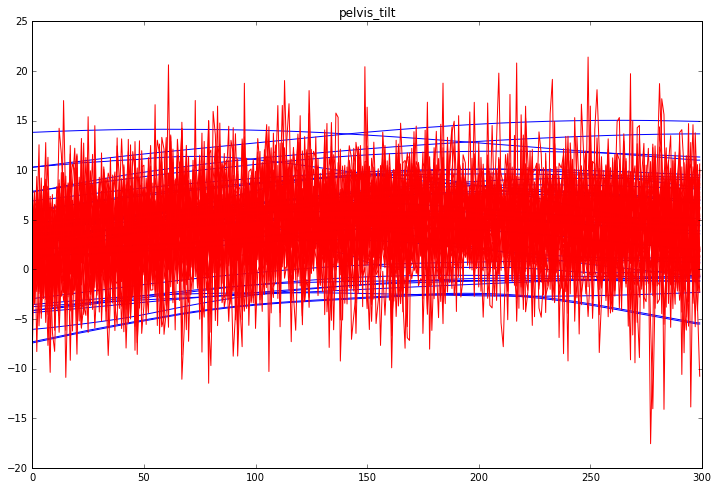

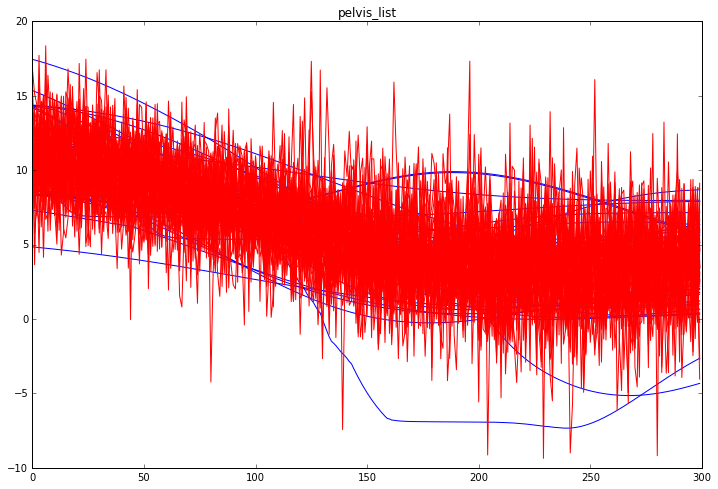

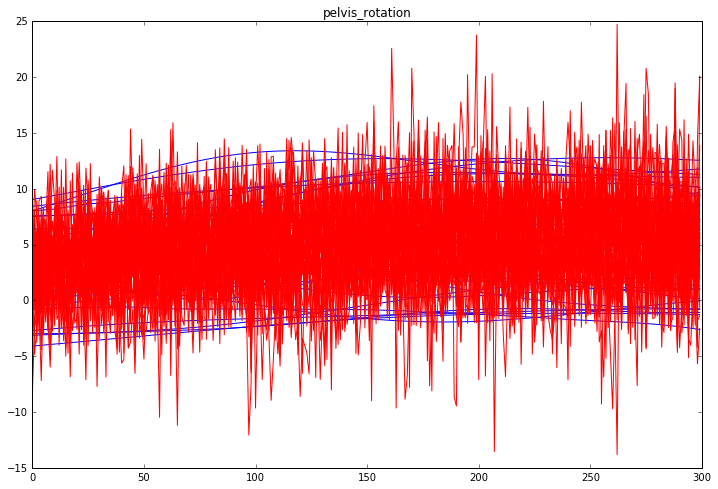

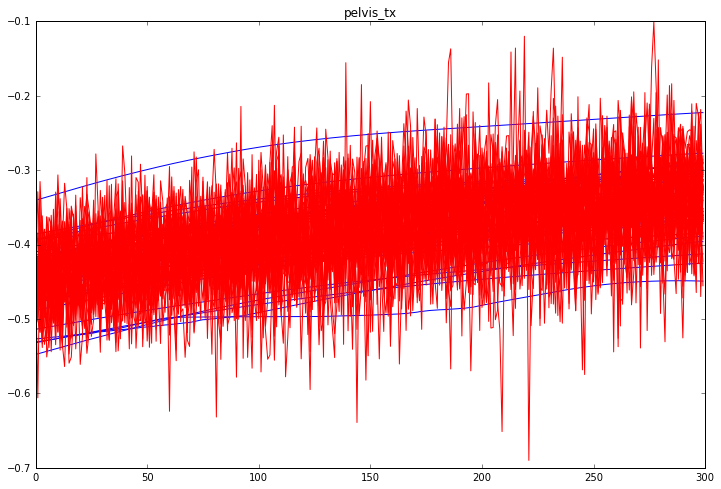

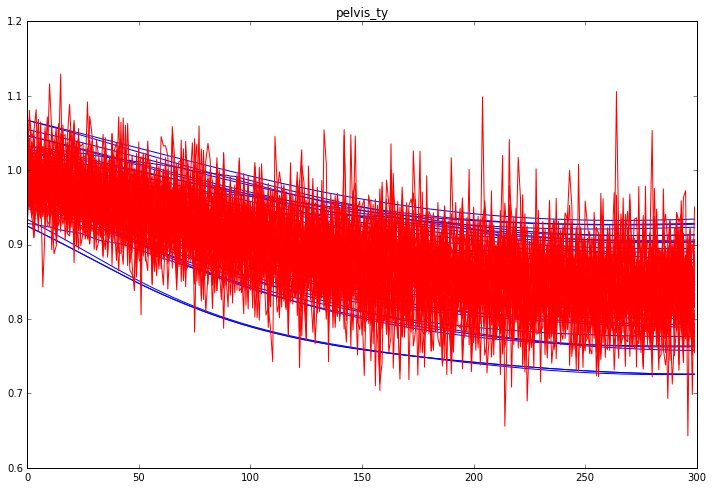

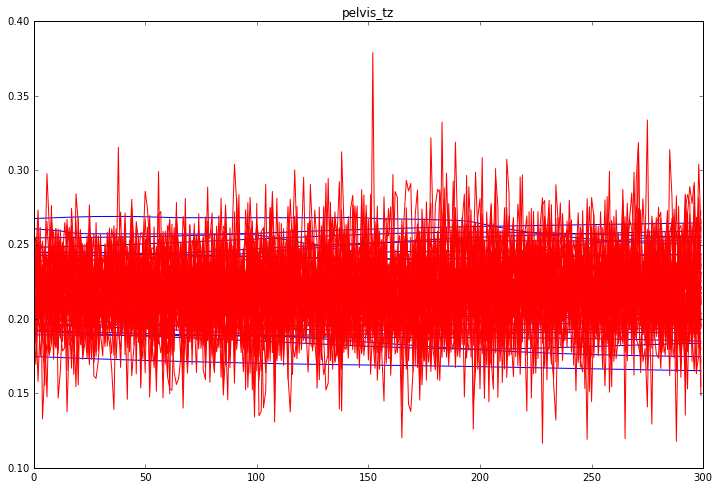

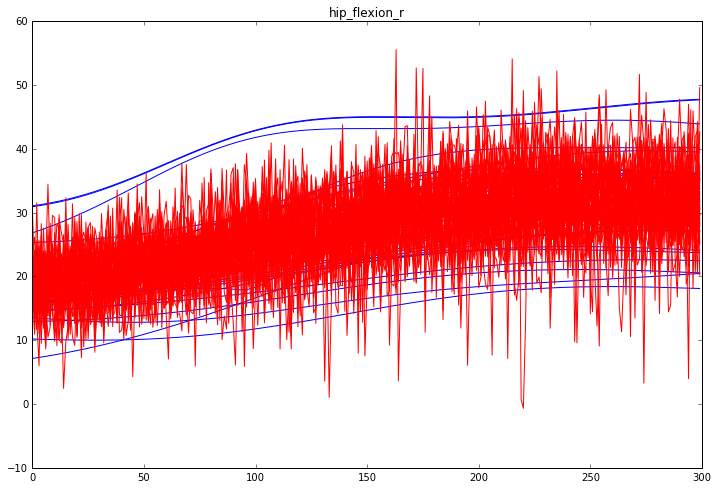

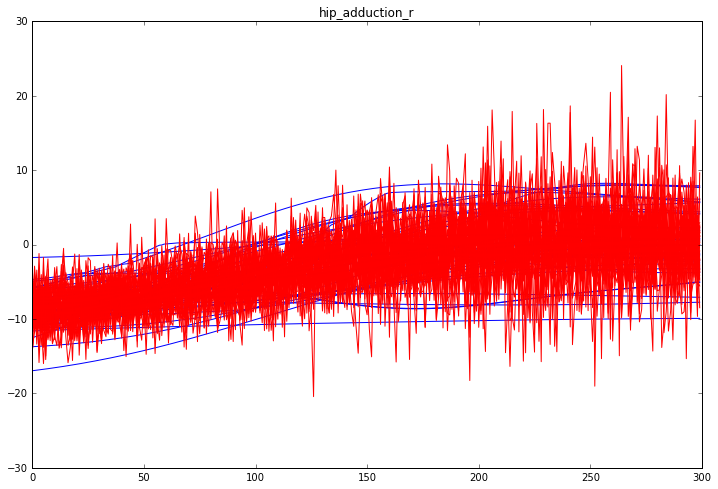

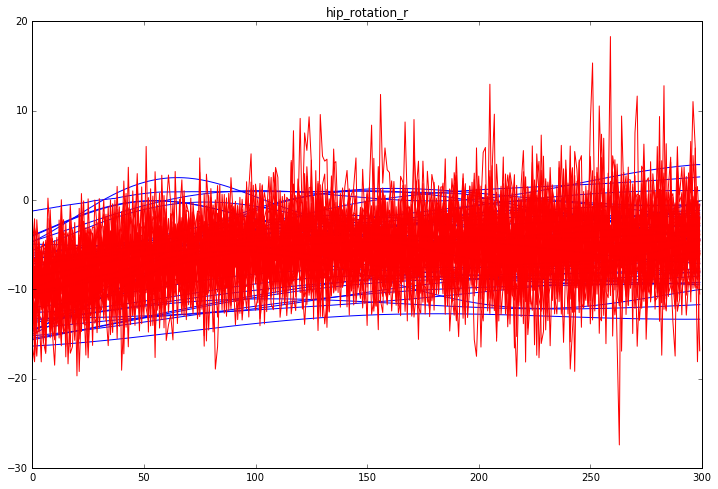

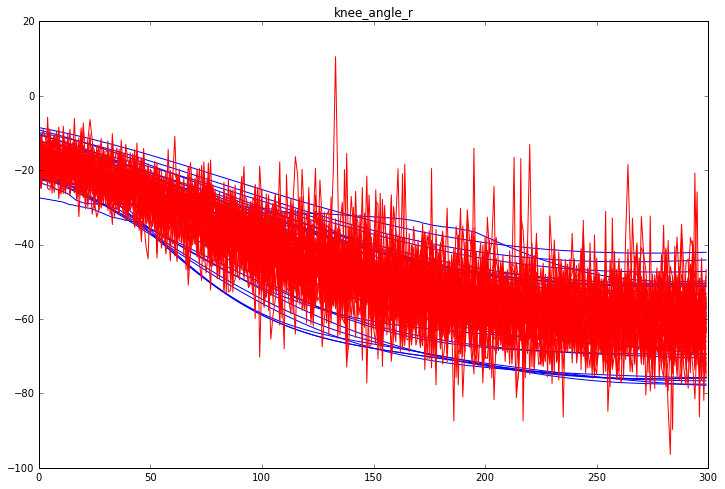

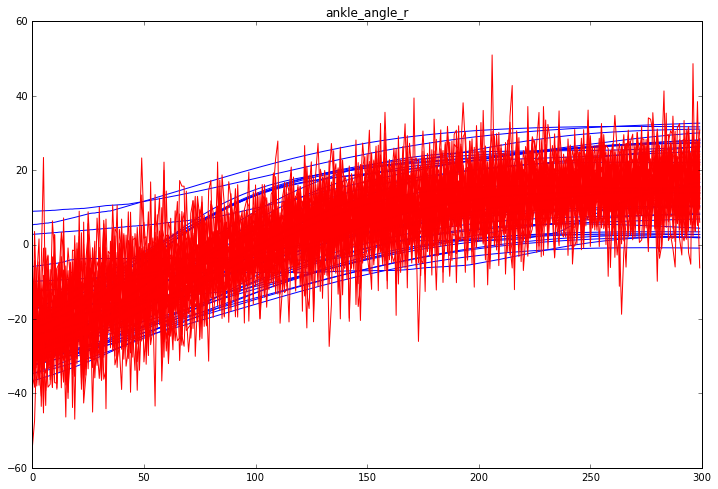

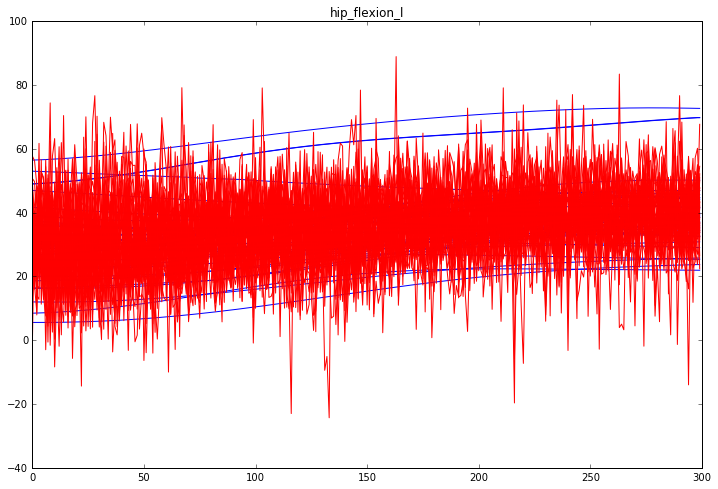

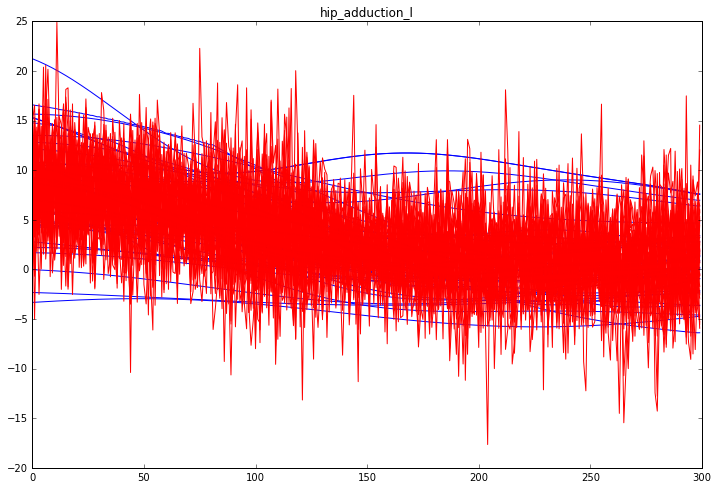

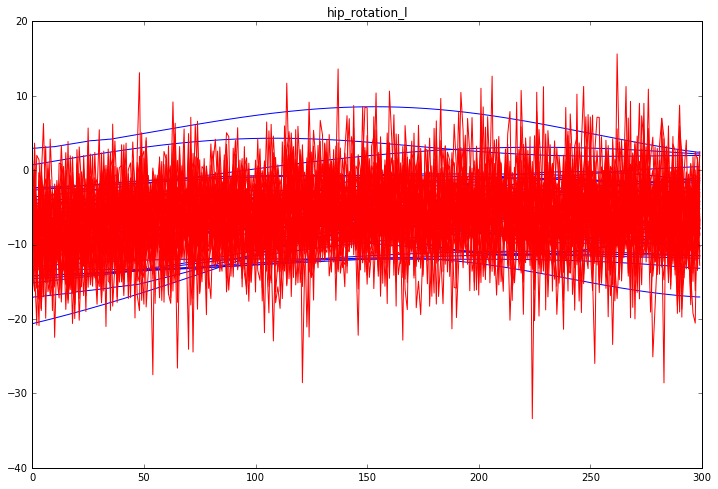

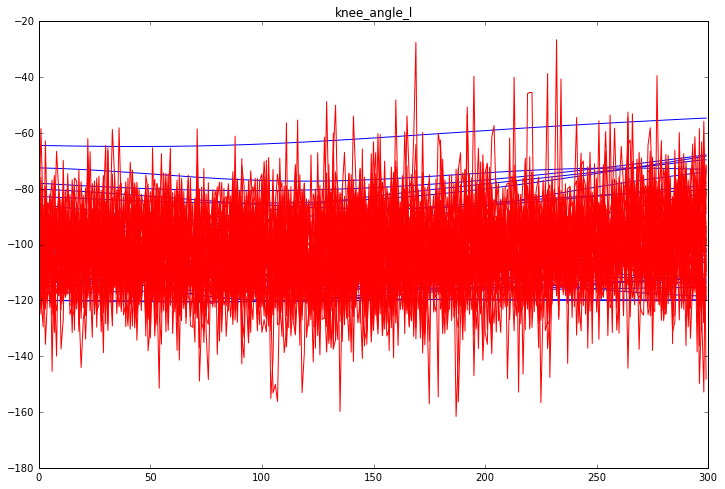

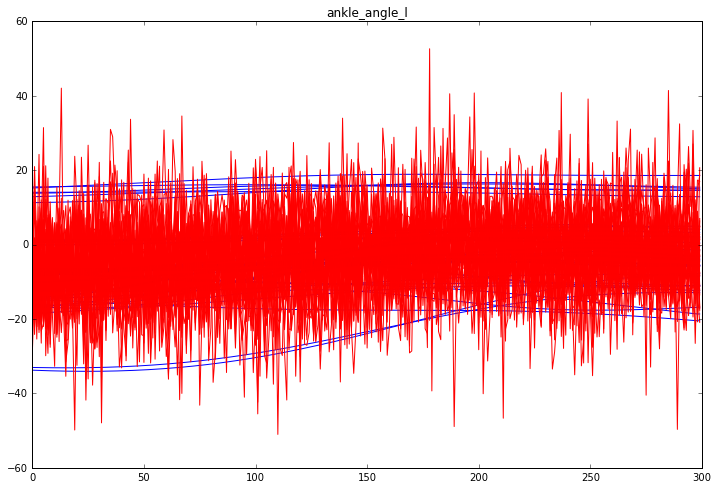

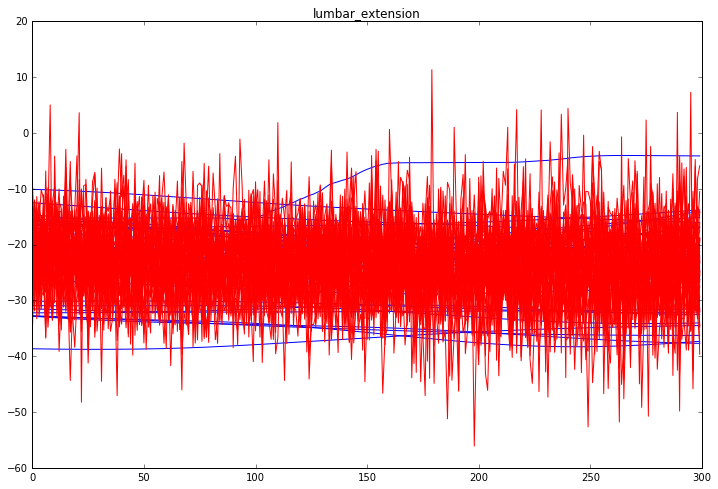

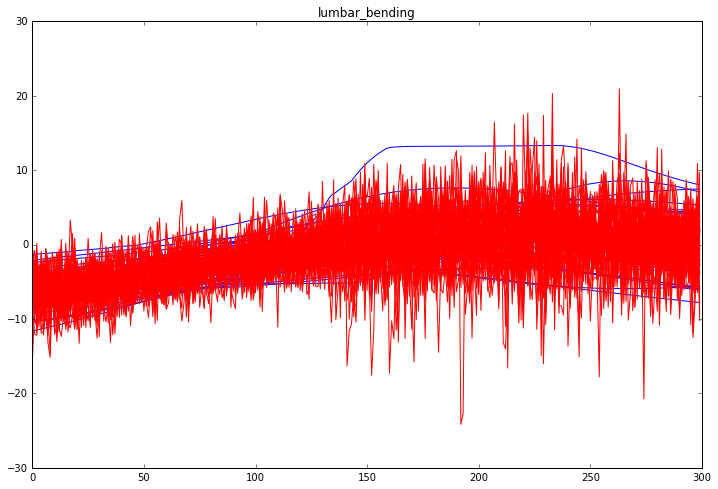

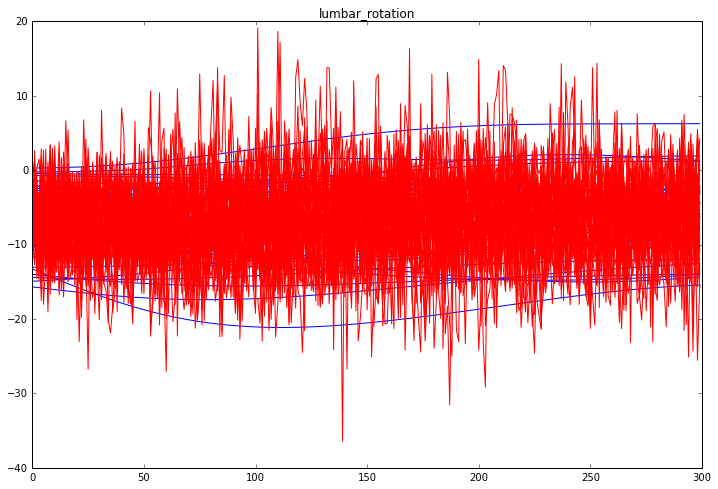

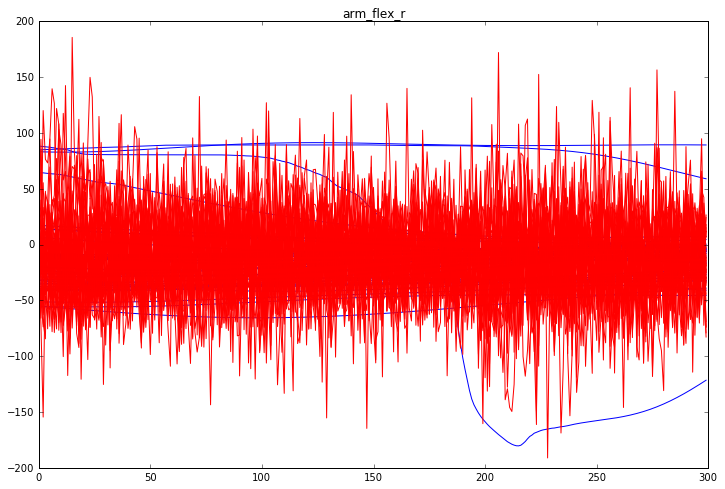

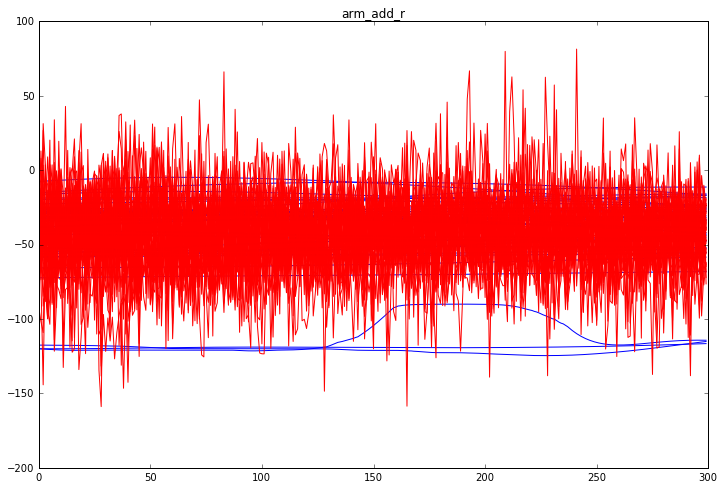

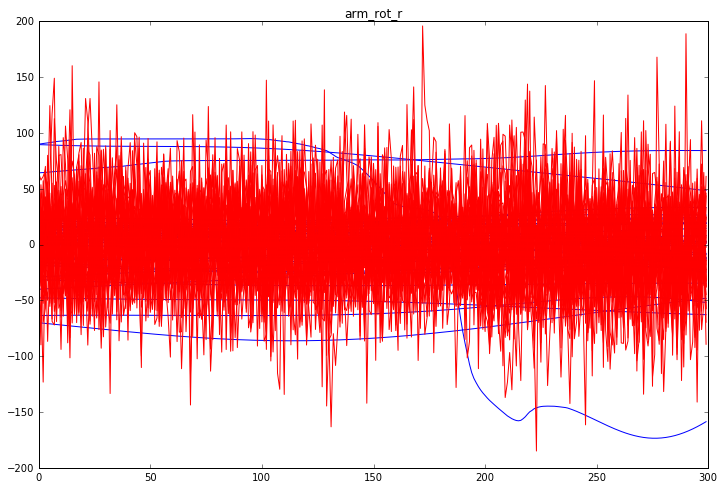

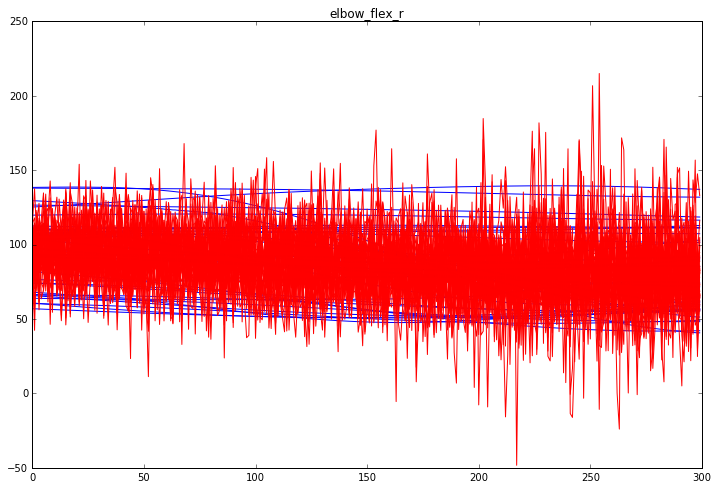

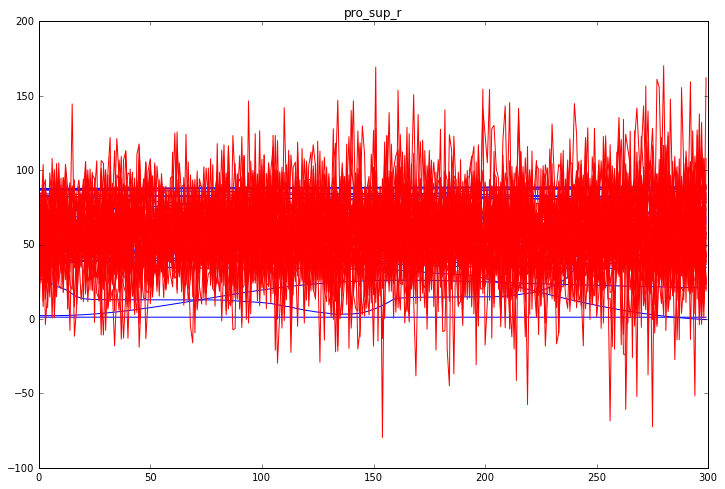

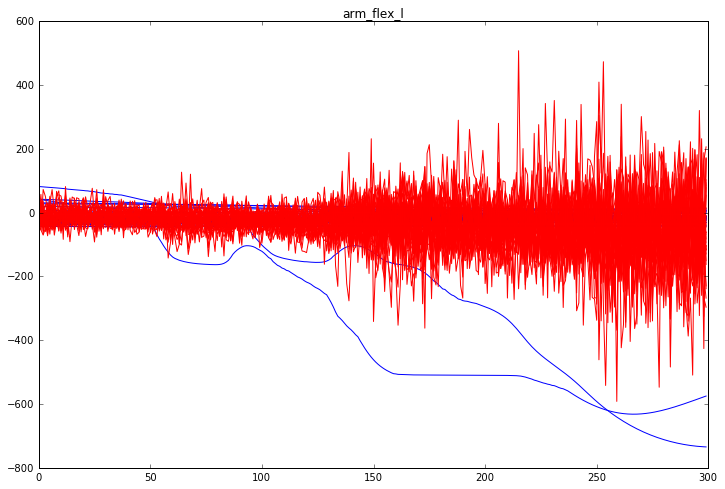

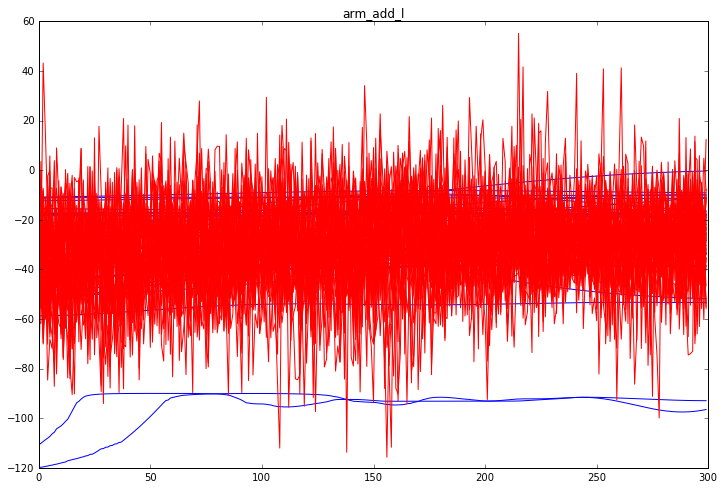

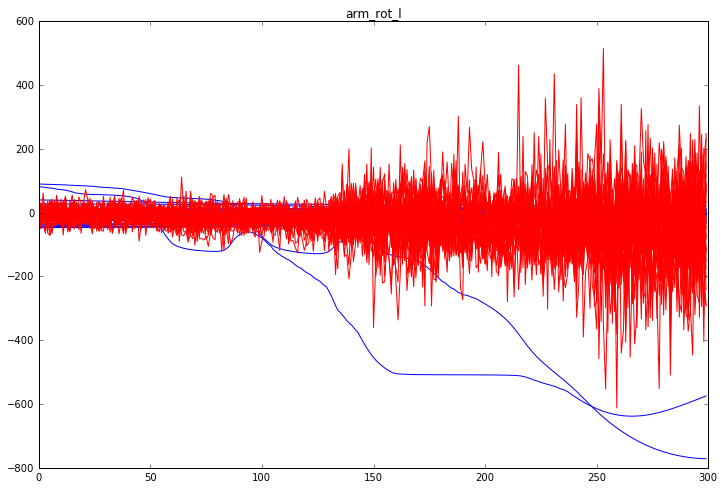

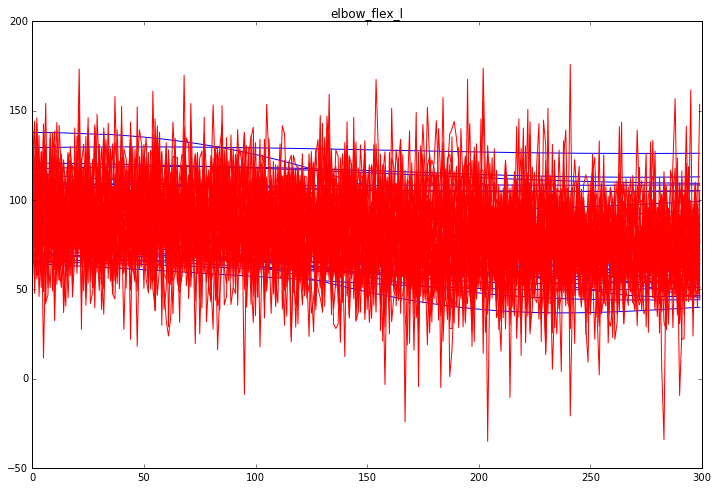

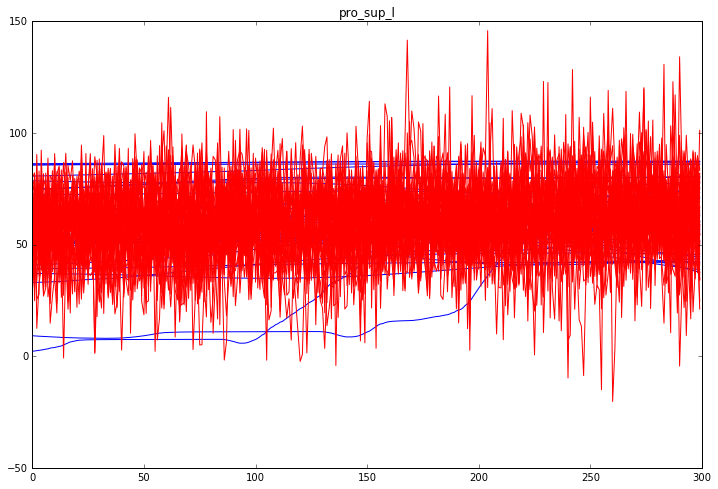

In [1579]:
for k in range(list_colums.size):
    fig = plt.figure(figsize=(12, 8))
    plt.plot(subj_all_angles_drop[list_colums[k]],'b')
    plt.plot(mat3[list_colums[k]],'r')
    plt.title(list_colums[k])
    plt.show()  

In [292]:
final_data = new_data.join(subj_all_angles[colmn_drop])

In [294]:
final_data.shape

(900, 47)

In [306]:
final_data.insert(loc = 0,column = 'time',value = np.arange(0,0.9,0.001))

In [301]:
final_data.shape[0]

900

In [307]:
rows = final_data.shape[0]
cols = final_data.shape[1]
f = open(cwd+'\New IK.mot','w')
f.write('Coordinates \n')
f.write('version=1 \n')
f.write('nRows={} \n'.format(rows))
f.write('nColumns={} \n'.format(cols))
f.write('inDegrees=yes \n')
f.write('\n')
f.write('Units are S.I. units (second, meters, Newtons, ...) \n')
f.write('Angles are in degrees. \n')
f.write('\n')
f.write('endheader \n')
for k in range(0,cols):
    f.write('{} \t'.format(final_data.columns[k]))
for i in range(0,rows):
    f.write('\n')
    for m in range(0,cols):
        f.write('{} \t'.format(str(final_data.values[i,m])))
f.close()